Ziel: Ich will die Bista-Daten zu den an den Schulen im Kanton Zürich gesprochenen Erstsprachen seit 2000 herunterladen, die Files verknüpfen (18 Dateien mit fast 80 000 Zeilen), nach den Gemeinden am Zürichsee filtern, sortieren und dann analysieren. Welche Sprachen haben besonders zugenommen, welche abgenommen? Was sind die Auffälligkeiten, wo gibt es Unterschiede? These: Durch die Personenfreizügigkeit (PFZ) nimmt der Anteil der Kinder aus den "traditionellen" Einwanderungsländern (Italien, Balkan) ab, jene aus den westlichen EU-Staaten hingegen zu.

In [114]:
import pandas as pd
import numpy as np
import re
import glob
%matplotlib inline

In [2]:
#zuerst der test mit einem der 18 files
path = "Erstsprache/Dateien/"

In [3]:
df = pd.read_excel(path + "Sprachen/Erstsprache nach Schulstufe_10_15_2019.xls", skiprows=[0,1,2,3])

In [4]:
df.head(2)

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
0,2017,Adlikon (Primar),Deutsch,0.0,12.0,0.0,NaN,NaN,NaN,NaN,12
1,2017,Adlikon (Primar),Kurdisch,0.0,2.0,0.0,NaN,NaN,NaN,NaN,2


In [5]:
len(df)

4597

In [6]:
#Sämtliche Files mit Glob auswählen
filenames = glob.glob(path + "Sprachen/*.xls")

In [7]:
#zahl der files testen
len(filenames)

18

In [8]:
filenames[0:2]

['Erstsprache/Dateien/Sprachen/Erstsprache nach Schulstufe_10_15_2019 (15).xls',
 'Erstsprache/Dateien/Sprachen/Erstsprache nach Schulstufe_10_15_2019 (1).xls']

In [9]:
dfs = []

In [10]:
#Einlesen mit list comprehension ("Blätter stapeln"), erste vier Zeilen skippen
dfs = [pd.read_excel(filename, skiprows=[0,1,2,3]) for filename in filenames]

In [11]:
#test, resp. durch die einzelnen dataframes gehen
dfs[4].head(5)

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
0,2004,Adlikon (Primar),Deutsch,0.0,15.0,0.0,NaN,NaN,NaN,NaN,15
1,2004,Adliswil (Einheitsgemeinde),Afrikanische Sprachen,0.0,1.0,3.0,0.0,0.0,0.0,0.0,4
2,2004,Adliswil (Einheitsgemeinde),Albanisch,24.0,58.0,13.0,7.0,15.0,7.0,4.0,128
3,2004,Adliswil (Einheitsgemeinde),Arabisch,2.0,2.0,2.0,0.0,1.0,1.0,1.0,9
4,2004,Adliswil (Einheitsgemeinde),Bosnisch,5.0,6.0,0.0,0.0,0.0,0.0,0.0,11


In [12]:
#Nun alle 18 Dateien zu einem Datenframe zusammenhängen
df_all = pd.concat(dfs, ignore_index=True)

In [13]:
df_all.shape

(74747, 11)

In [14]:
df_all.head(5)

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
0,2002,Adlikon (Primar),Deutsch,0.0,15.0,0.0,NaN,NaN,NaN,NaN,15
1,2002,Adliswil (Einheitsgemeinde),Afrikanische Sprachen,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3
2,2002,Adliswil (Einheitsgemeinde),Albanisch,12.0,63.0,10.0,4.0,8.0,2.0,4.0,103
3,2002,Adliswil (Einheitsgemeinde),Andere asiatische Sprachen,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
4,2002,Adliswil (Einheitsgemeinde),Arabisch,1.0,3.0,2.0,1.0,0.0,0.0,1.0,8


In [15]:
df_all.dtypes

Jahr               int64
Schulgemeinde     object
Erstsprache       object
KG               float64
PS               float64
PS Sonder        float64
Sek A            float64
Sek B            float64
Sek C            float64
Sek Sonder       float64
Total              int64
dtype: object

In [16]:
#wie heissen die Schulgemeinden?
df_all["Schulgemeinde"].unique()

array(['Adlikon (Primar)', 'Adliswil (Einheitsgemeinde)',
       'Aesch (Primar)', 'Aeugst a.A. (Primar)',
       'Affoltern a.A. (Primar)', 'Affoltern a.A.-Aeugst (Sekundar)',
       'Altikon (Primar + Pol. Gem.)', 'Andelfingen (Primar)',
       'Andelfingen (Sekundar)', 'Bachenbülach (Primar)',
       'Bachs (Primar)', 'Bäretswil (Einheitsgemeinde)',
       'Bassersdorf (Einheitsgemeinde)', 'Bauma (Einheitsgemeinde)',
       'Benken (Primar)', 'Berg a.I. (Primar)',
       'Bertschikon (Primar + Pol. Gem.)', 'Birmensdorf (Primar)',
       'Birmensdorf-Aesch (Sekundar)', 'Bonstetten (Primar)',
       'Bonstetten (Sekundar)', 'Boppelsen (Primar)',
       'Brütten (Einheitsgemeinde)', 'Bubikon (Primar + Sekundar)',
       'Buch a.I. (Primar)', 'Buchs (Primar)',
       'Bülach (Primar + Pol. Gem.)', 'Bülach (Sekundar)',
       'Dachsen (Primar)', 'Dägerlen (Primar)',
       'Dällikon (Primar + Pol. Gem.)', 'Dänikon-Hüttikon (Primar)',
       'Dättlikon (Einheitsgemeinde)', 'Dielsdorf (Pri

In [17]:
#welche Sprachen gibt es?
df_all["Erstsprache"].unique()

array(['Deutsch', 'Afrikanische Sprachen', 'Albanisch',
       'Andere asiatische Sprachen', 'Arabisch', 'Bosnisch', 'Chinesisch',
       'Englisch', 'Finnisch', 'Französisch', 'Griechisch',
       'Iranische Sprachen', 'Italienisch', 'Kroatisch', 'Kurdisch',
       'Mazedonisch', 'Nicht erhoben (nur tertiär)', 'Niederländisch',
       'Norwegisch', 'Polnisch', 'Portugiesisch', 'Rätoromanisch',
       'Rumänisch', 'Russisch', 'Schwedisch', 'Serbisch', 'Slowenisch',
       'Spanische Sprachen', 'Südslawisch', 'Tamil', 'Thai',
       'Tschechisch', 'Türkisch', 'Übrige europäische Sprachen',
       'Übrige indoari. und drawid.Spr', 'Übrige ostasiatische Sprachen',
       'Übrige slawische Sprachen', 'Übrige Sprachen', 'Dänisch',
       'Slowakisch', 'Übrige afrikanische Sprachen',
       'Übrige osteuropäische Sprachen', 'Ungarisch', 'Isländisch',
       'Übrige westasiatische Sprachen', 'Tschechoslowakische Sprachen',
       'Bulgarisch', 'Somali', 'Koreanisch', 'Übrige westeurop. Sprach

In [18]:
#welche Jahre?
df_all["Jahr"].unique()

array([2002, 2016, 2003, 2011, 2004, 2010, 2005, 2009, 2013, 2006, 2012,
       2007, 2008, 2015, 2000, 2017, 2014, 2001])

In [19]:
# Eine Liste mit den Schulgemeinden machen, die mich interessieren (Zürichsee)
gemeinden = ["Adliswil (Einheitsgemeinde)",
             "Erlenbach (Einheitsgemeinde)",
             "Herrliberg (Einheitsgemeinde)",
             "Hirzel (Einheitsgemeinde)",
             "Hombrechtikon (Einheitsgemeinde)",
             "Horgen (Einheitsgemeinde)",
             "Hütten (Primar)",
             "Kilchberg (Einheitsgemeinde)",
             "Küsnacht (Primar + Sekundar)",
             "Langnau a.A. (Einheitsgemeinde)",
             "Männedorf (Einheitsgemeinde)",
             "Meilen (Einheitsgemeinde)",
             "Oberrieden (Einheitsgemeinde)",
             "Oetwil a.S. (Einheitsgemeinde)",
             "Richterswil (Einheitsgemeinde)",
             "Rüschlikon (Einheitsgemeinde)",
             "Schönenberg (Primar + Pol. Gem.)",
             "Stäfa (Primar + Sekundar)",
             "Thalwil (Einheitsgemeinde)",
             "Uetikon a.S. (Einheitsgemeinde)",
             "Wädenswil (Primar + Pol. Gem.)",
             "Wädenswil (Sekundar)",
             "Zollikon (Einheitsgemeinde)",
             "Zumikon (Primar + Sekundar)",
             "Erlenbach-Herrliberg (Sek.schul Verband)",
             "Hütten (Primar + Pol. Gem.)",
             "Kilchberg-Rüschlikon (Sek.schul Verband)",
             "Stäfa (Einheitsgemeinde)",
             "Zumikon (Einheitsgemeinde)"
            ]

In [20]:
# neues Dataframe schaffen nur mit "meinen" Gemeinden
df_all[df_all["Schulgemeinde"].isin(gemeinden)]

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
1,2002,Adliswil (Einheitsgemeinde),Afrikanische Sprachen,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3
2,2002,Adliswil (Einheitsgemeinde),Albanisch,12.0,63.0,10.0,4.0,8.0,2.0,4.0,103
3,2002,Adliswil (Einheitsgemeinde),Andere asiatische Sprachen,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
4,2002,Adliswil (Einheitsgemeinde),Arabisch,1.0,3.0,2.0,1.0,0.0,0.0,1.0,8
5,2002,Adliswil (Einheitsgemeinde),Bosnisch,3.0,3.0,1.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...
74435,2001,Zumikon (Primar + Sekundar),Türkisch,0.0,4.0,0.0,0.0,1.0,0.0,0.0,5
74436,2001,Zumikon (Primar + Sekundar),Übrige afrikanische Sprachen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
74437,2001,Zumikon (Primar + Sekundar),Übrige europäische Sprachen,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3
74438,2001,Zumikon (Primar + Sekundar),Übrige Sprachen,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [21]:
# das neue Dataframe für die weitere Verarbeitung definieren
df_zuerichsee = df_all[df_all["Schulgemeinde"].isin(gemeinden)]

In [22]:
#test
df_zuerichsee.head(5)

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
1,2002,Adliswil (Einheitsgemeinde),Afrikanische Sprachen,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3
2,2002,Adliswil (Einheitsgemeinde),Albanisch,12.0,63.0,10.0,4.0,8.0,2.0,4.0,103
3,2002,Adliswil (Einheitsgemeinde),Andere asiatische Sprachen,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
4,2002,Adliswil (Einheitsgemeinde),Arabisch,1.0,3.0,2.0,1.0,0.0,0.0,1.0,8
5,2002,Adliswil (Einheitsgemeinde),Bosnisch,3.0,3.0,1.0,0.0,0.0,0.0,0.0,7


In [23]:
df_zuerichsee.dtypes

Jahr               int64
Schulgemeinde     object
Erstsprache       object
KG               float64
PS               float64
PS Sonder        float64
Sek A            float64
Sek B            float64
Sek C            float64
Sek Sonder       float64
Total              int64
dtype: object

In [24]:
df_zuerichsee.info

<bound method DataFrame.info of        Jahr                Schulgemeinde                   Erstsprache    KG  \
1      2002  Adliswil (Einheitsgemeinde)         Afrikanische Sprachen   1.0   
2      2002  Adliswil (Einheitsgemeinde)                     Albanisch  12.0   
3      2002  Adliswil (Einheitsgemeinde)    Andere asiatische Sprachen   0.0   
4      2002  Adliswil (Einheitsgemeinde)                      Arabisch   1.0   
5      2002  Adliswil (Einheitsgemeinde)                      Bosnisch   3.0   
...     ...                          ...                           ...   ...   
74435  2001  Zumikon (Primar + Sekundar)                      Türkisch   0.0   
74436  2001  Zumikon (Primar + Sekundar)  Übrige afrikanische Sprachen   1.0   
74437  2001  Zumikon (Primar + Sekundar)   Übrige europäische Sprachen   2.0   
74438  2001  Zumikon (Primar + Sekundar)               Übrige Sprachen   0.0   
74439  2001  Zumikon (Primar + Sekundar)                     Ungarisch   0.0   

       

In [25]:
#sortierung testen
df_zuerichsee.sort_values('Total', ascending=False).head(5)

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
73827,2001,Wädenswil (Primar + Pol. Gem.),Deutsch,304.0,849.0,48.0,NaN,NaN,NaN,NaN,1201
2752,2002,Wädenswil (Primar + Pol. Gem.),Deutsch,294.0,866.0,40.0,NaN,NaN,NaN,NaN,1200
61370,2000,Wädenswil (Primar + Pol. Gem.),Deutsch,276.0,846.0,44.0,NaN,NaN,NaN,NaN,1166
11137,2003,Wädenswil (Primar + Pol. Gem.),Deutsch,265.0,847.0,52.0,NaN,NaN,NaN,NaN,1164
10418,2003,Richterswil (Einheitsgemeinde),Deutsch,196.0,657.0,12.0,155.0,114.0,12.0,0.0,1146


In [26]:
#Den Index auf Jahre setzen
df_zuerichsee.set_index('Jahr', inplace=True)

In [27]:
#test
df_zuerichsee

,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
Jahr,,,,,,,,,,
2002,Adliswil (Einheitsgemeinde),Afrikanische Sprachen,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3
2002,Adliswil (Einheitsgemeinde),Albanisch,12.0,63.0,10.0,4.0,8.0,2.0,4.0,103
2002,Adliswil (Einheitsgemeinde),Andere asiatische Sprachen,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
2002,Adliswil (Einheitsgemeinde),Arabisch,1.0,3.0,2.0,1.0,0.0,0.0,1.0,8
2002,Adliswil (Einheitsgemeinde),Bosnisch,3.0,3.0,1.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...
2001,Zumikon (Primar + Sekundar),Türkisch,0.0,4.0,0.0,0.0,1.0,0.0,0.0,5
2001,Zumikon (Primar + Sekundar),Übrige afrikanische Sprachen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2001,Zumikon (Primar + Sekundar),Übrige europäische Sprachen,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3


In [28]:
#eine Sprache auswählen, in diesem Fall Albanisch
df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Albanisch']

,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
Jahr,,,,,,,,,,
2002,Adliswil (Einheitsgemeinde),Albanisch,12.0,63.0,10.0,4.0,8.0,2.0,4.0,103
2002,Erlenbach (Einheitsgemeinde),Albanisch,2.0,14.0,0.0,1.0,2.0,0.0,0.0,19
2002,Herrliberg (Einheitsgemeinde),Albanisch,3.0,8.0,2.0,1.0,2.0,0.0,0.0,16
2002,Hirzel (Einheitsgemeinde),Albanisch,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2
2002,Hombrechtikon (Einheitsgemeinde),Albanisch,14.0,38.0,7.0,2.0,9.0,5.0,3.0,78
...,...,...,...,...,...,...,...,...,...,...
2001,Uetikon a.S. (Einheitsgemeinde),Albanisch,6.0,13.0,0.0,0.0,1.0,0.0,0.0,20
2001,Wädenswil (Primar + Pol. Gem.),Albanisch,21.0,61.0,14.0,NaN,NaN,NaN,NaN,96
2001,Wädenswil (Sekundar),Albanisch,NaN,NaN,NaN,1.0,12.0,13.0,7.0,33


In [29]:
#Die Daten neu anordnen, damit ich die Jahresverläufe plotten kann
df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='Total')

Schulgemeinde,Adliswil (Einheitsgemeinde),Erlenbach (Einheitsgemeinde),Erlenbach-Herrliberg (Sek.schul Verband),Herrliberg (Einheitsgemeinde),Hirzel (Einheitsgemeinde),Hombrechtikon (Einheitsgemeinde),Horgen (Einheitsgemeinde),Hütten (Primar + Pol. Gem.),Hütten (Primar),Kilchberg (Einheitsgemeinde),...,Schönenberg (Primar + Pol. Gem.),Stäfa (Einheitsgemeinde),Stäfa (Primar + Sekundar),Thalwil (Einheitsgemeinde),Uetikon a.S. (Einheitsgemeinde),Wädenswil (Primar + Pol. Gem.),Wädenswil (Sekundar),Zollikon (Einheitsgemeinde),Zumikon (Einheitsgemeinde),Zumikon (Primar + Sekundar)
Jahr,,,,,,,,,,,,,,,,,,,,,
2000,108.0,13.0,NaN,13.0,NaN,69.0,191.0,NaN,2.0,30.0,...,2.0,NaN,63.0,92.0,18.0,82.0,26.0,17.0,NaN,11.0
2001,104.0,16.0,NaN,15.0,2.0,78.0,194.0,NaN,4.0,30.0,...,2.0,NaN,57.0,85.0,20.0,96.0,33.0,22.0,NaN,5.0
2002,103.0,19.0,NaN,16.0,2.0,78.0,194.0,NaN,5.0,22.0,...,NaN,NaN,61.0,87.0,24.0,101.0,32.0,23.0,NaN,5.0
2003,112.0,17.0,NaN,15.0,7.0,80.0,204.0,NaN,4.0,19.0,...,NaN,NaN,64.0,84.0,28.0,87.0,41.0,21.0,NaN,5.0
2004,128.0,21.0,NaN,14.0,6.0,83.0,214.0,NaN,3.0,15.0,...,NaN,NaN,70.0,88.0,28.0,89.0,41.0,24.0,NaN,4.0
2005,127.0,24.0,NaN,14.0,6.0,82.0,225.0,NaN,4.0,10.0,...,NaN,NaN,84.0,85.0,32.0,89.0,45.0,27.0,NaN,5.0
2006,128.0,21.0,NaN,13.0,7.0,79.0,237.0,NaN,3.0,10.0,...,NaN,NaN,80.0,85.0,32.0,99.0,33.0,26.0,NaN,3.0
2007,128.0,13.0,10.0,9.0,6.0,71.0,233.0,NaN,4.0,7.0,...,NaN,NaN,79.0,86.0,33.0,101.0,27.0,15.0,NaN,3.0
2008,125.0,10.0,10.0,8.0,4.0,69.0,225.0,NaN,4.0,6.0,...,NaN,NaN,75.0,90.0,34.0,102.0,22.0,15.0,NaN,1.0


In [30]:
# ein neues dataframe mit albanisch
df_albanisch = df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                                      columns='Schulgemeinde', 
                                                                                      values='Total')

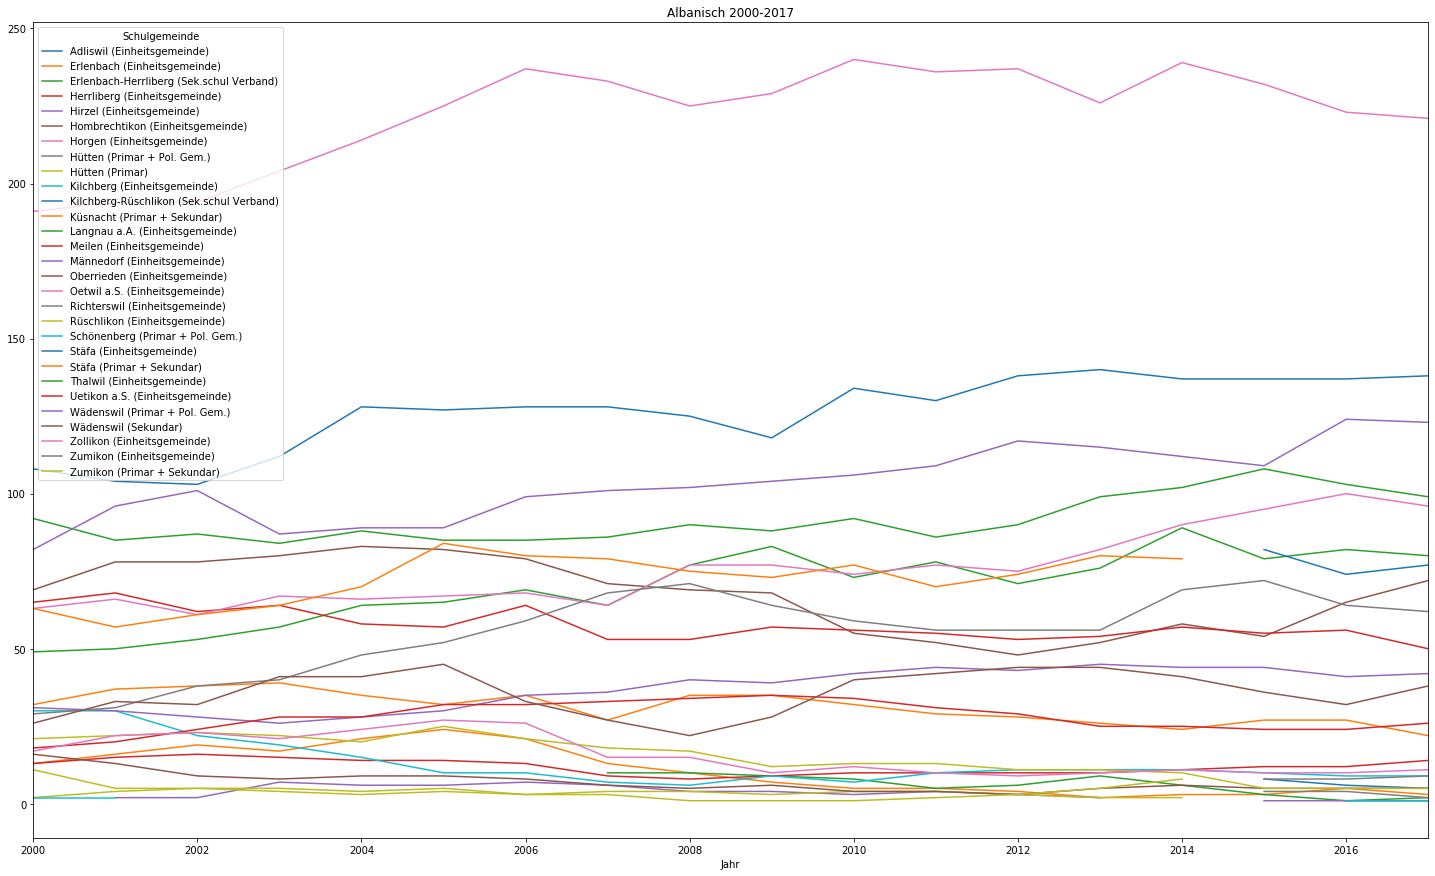

In [31]:
#plotten....
df_albanisch.plot(figsize=(25,15), title="Albanisch 2000-2017")

In [32]:
#wie sieht es auf Kindergartenstufe aus?
df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='KG')

Schulgemeinde,Adliswil (Einheitsgemeinde),Erlenbach (Einheitsgemeinde),Herrliberg (Einheitsgemeinde),Hirzel (Einheitsgemeinde),Hombrechtikon (Einheitsgemeinde),Horgen (Einheitsgemeinde),Hütten (Primar + Pol. Gem.),Hütten (Primar),Kilchberg (Einheitsgemeinde),Küsnacht (Primar + Sekundar),...,Rüschlikon (Einheitsgemeinde),Schönenberg (Primar + Pol. Gem.),Stäfa (Einheitsgemeinde),Stäfa (Primar + Sekundar),Thalwil (Einheitsgemeinde),Uetikon a.S. (Einheitsgemeinde),Wädenswil (Primar + Pol. Gem.),Zollikon (Einheitsgemeinde),Zumikon (Einheitsgemeinde),Zumikon (Primar + Sekundar)
Jahr,,,,,,,,,,,,,,,,,,,,,
2000,22.0,2.0,4.0,NaN,11.0,34.0,NaN,0.0,0.0,4.0,...,3.0,2.0,NaN,14.0,18.0,7.0,10.0,4.0,NaN,0.0
2001,13.0,3.0,3.0,1.0,13.0,38.0,NaN,2.0,4.0,7.0,...,4.0,1.0,NaN,11.0,19.0,6.0,21.0,9.0,NaN,0.0
2002,12.0,2.0,3.0,0.0,14.0,40.0,NaN,3.0,2.0,6.0,...,2.0,NaN,NaN,13.0,18.0,6.0,28.0,8.0,NaN,0.0
2003,21.0,2.0,4.0,2.0,13.0,41.0,NaN,1.0,2.0,3.0,...,1.0,NaN,NaN,14.0,14.0,8.0,22.0,4.0,NaN,0.0
2004,24.0,3.0,3.0,1.0,13.0,41.0,NaN,1.0,3.0,4.0,...,1.0,NaN,NaN,14.0,14.0,7.0,24.0,5.0,NaN,0.0
2005,23.0,5.0,4.0,0.0,16.0,41.0,NaN,1.0,3.0,3.0,...,3.0,NaN,NaN,18.0,17.0,6.0,27.0,5.0,NaN,1.0
2006,20.0,4.0,3.0,1.0,14.0,43.0,NaN,1.0,2.0,10.0,...,2.0,NaN,NaN,17.0,19.0,6.0,24.0,3.0,NaN,1.0
2007,22.0,0.0,0.0,1.0,9.0,37.0,NaN,1.0,3.0,7.0,...,1.0,NaN,NaN,16.0,14.0,9.0,22.0,1.0,NaN,0.0
2008,20.0,1.0,1.0,0.0,10.0,34.0,NaN,1.0,2.0,5.0,...,3.0,NaN,NaN,13.0,17.0,7.0,23.0,2.0,NaN,0.0


In [33]:
df_albanisch_kiga = df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                                           columns='Schulgemeinde',
                                                                                           values='KG')

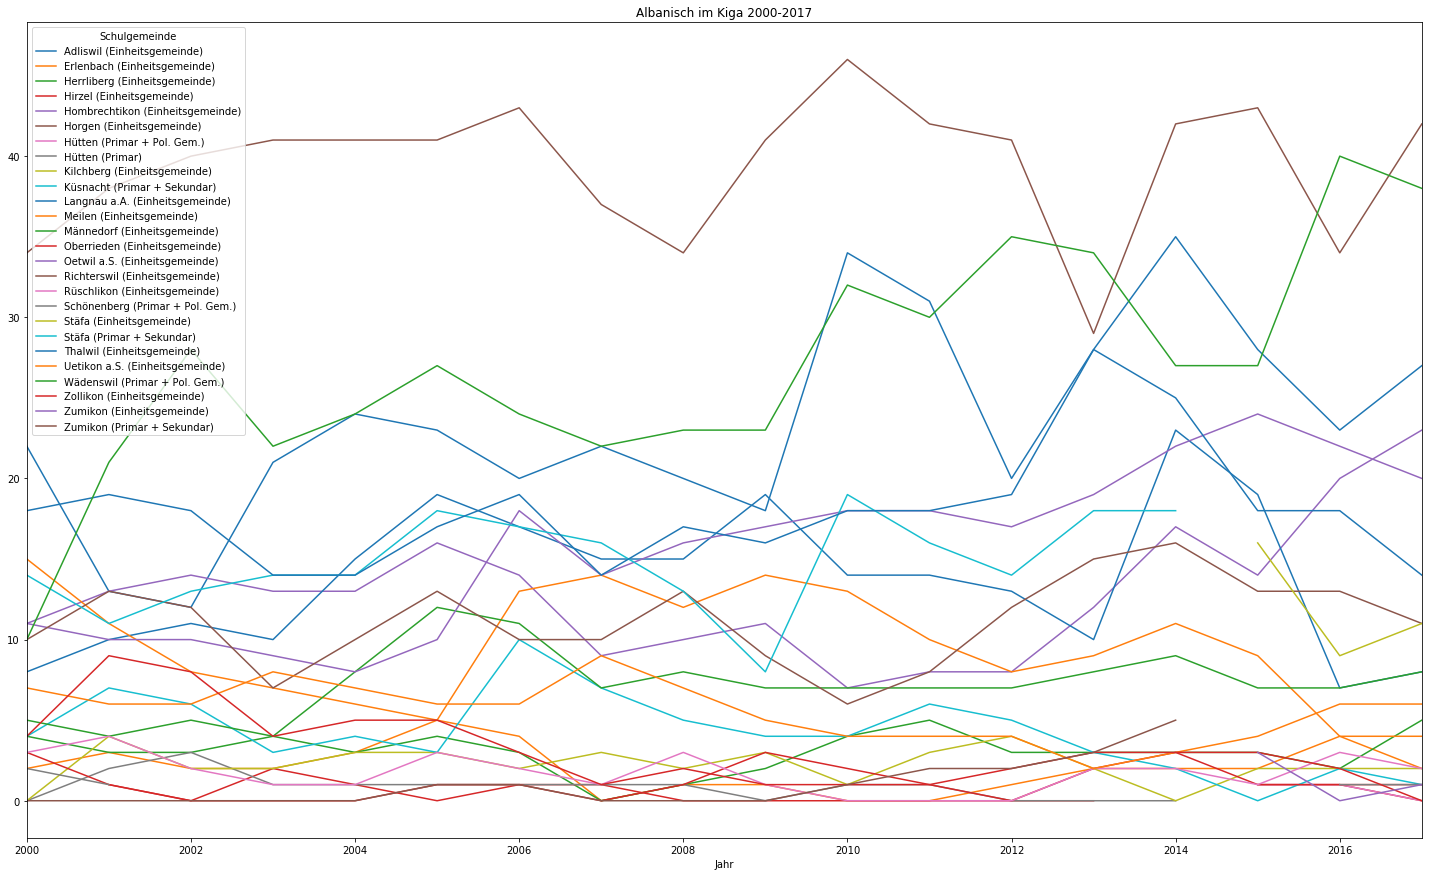

In [34]:
df_albanisch_kiga.plot(figsize=(25,15), title="Albanisch im Kiga 2000-2017")

In [35]:
#wie viele albanischsprechende Kinder gab es total in allen gemeinden im jahr 2000?
df_albanisch.loc[2000].sum()

1043.0

In [36]:
#wie viele 2010?
df_albanisch.loc[2010].sum()

1181.0

In [37]:
#wie viele 2015?
df_albanisch.loc[2015].sum()

1223.0

In [38]:
#und wie viele 2017?
df_albanisch.loc[2017].sum()

1213.0

Fazit: Der Anteil Kinder mit albanisch als Erstsprache nimmt in vielen Gemeinden kaum noch zu, teils sogar ab. Er hat sich stabilisiert in den letzten 5-10 Jahren.

In [39]:
#nehmen wir eine Sprache, die am Zürichsee eigentlich durch PFZ einen Boom erlebt haben sollte: Englisch

In [40]:
df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Englisch']

,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
Jahr,,,,,,,,,,
2002,Adliswil (Einheitsgemeinde),Englisch,5.0,16.0,1.0,3.0,0.0,0.0,0.0,25
2002,Erlenbach (Einheitsgemeinde),Englisch,7.0,8.0,0.0,1.0,2.0,0.0,0.0,18
2002,Herrliberg (Einheitsgemeinde),Englisch,3.0,14.0,0.0,0.0,2.0,0.0,0.0,19
2002,Hirzel (Einheitsgemeinde),Englisch,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5
2002,Hombrechtikon (Einheitsgemeinde),Englisch,2.0,4.0,0.0,1.0,2.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...
2001,Uetikon a.S. (Einheitsgemeinde),Englisch,2.0,5.0,0.0,1.0,0.0,0.0,0.0,8
2001,Wädenswil (Primar + Pol. Gem.),Englisch,3.0,10.0,1.0,NaN,NaN,NaN,NaN,14
2001,Wädenswil (Sekundar),Englisch,NaN,NaN,NaN,0.0,2.0,0.0,0.0,2


In [41]:
df_englisch = df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Englisch'].pivot_table(index='Jahr', 
                                                                                    columns='Schulgemeinde', 
                                                                                    values='Total')

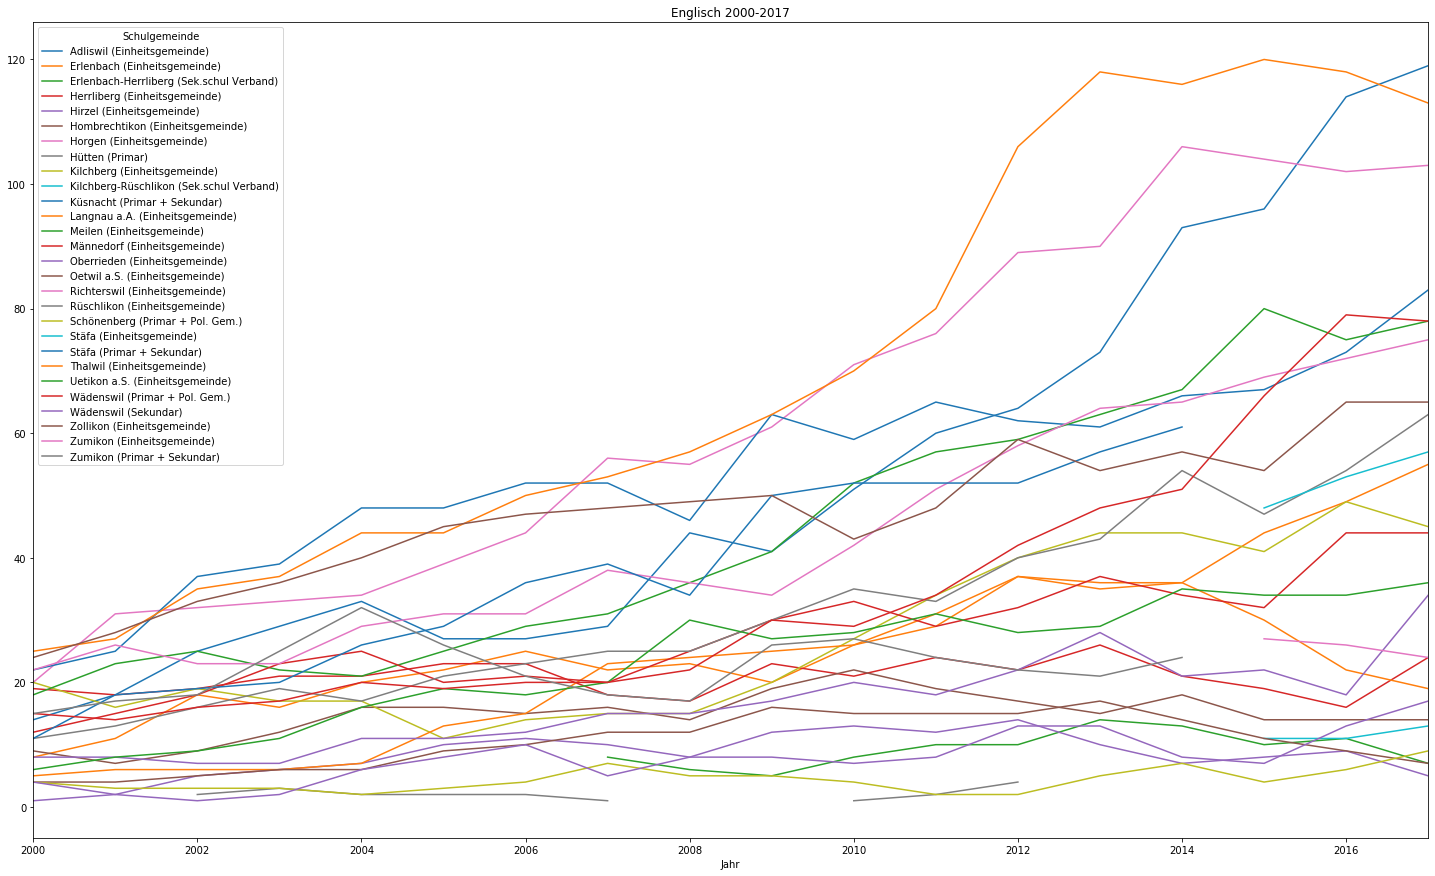

In [42]:
df_englisch.plot(figsize=(25,15), title="Englisch 2000-2017")

In [43]:
df_englisch.loc[2000].sum()

297.0

In [44]:
df_englisch.loc[2008].sum()

623.0

In [45]:
df_englisch.loc[2017].sum()

1187.0

In [ ]:
#Wie stehen die Sprachen zueinander im Verhältnis?

In [51]:
#Neues Dataframe mit dem Jahr 2000 und dem Anteil aller gesprochenen Sprachen in den Zürichseegemeinden
df_zuerichsee.loc[2000]

,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
Jahr,,,,,,,,,,
2000,Adliswil (Einheitsgemeinde),Afrikanische Sprachen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2000,Adliswil (Einheitsgemeinde),Albanisch,22.0,54.0,7.0,2.0,13.0,8.0,2.0,108
2000,Adliswil (Einheitsgemeinde),Andere asiatische Sprachen,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3
2000,Adliswil (Einheitsgemeinde),Arabisch,1.0,3.0,1.0,0.0,0.0,0.0,0.0,5
2000,Adliswil (Einheitsgemeinde),Bosnisch,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...
2000,Zumikon (Primar + Sekundar),Spanische Sprachen,1.0,8.0,0.0,1.0,1.0,0.0,0.0,11
2000,Zumikon (Primar + Sekundar),Südslawisch,2.0,2.0,0.0,3.0,2.0,0.0,0.0,9
2000,Zumikon (Primar + Sekundar),Türkisch,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5


In [52]:
df_zuerichsee2000 = df_zuerichsee.loc[2000]

In [53]:
df_zuerichsee2000

,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
Jahr,,,,,,,,,,
2000,Adliswil (Einheitsgemeinde),Afrikanische Sprachen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2000,Adliswil (Einheitsgemeinde),Albanisch,22.0,54.0,7.0,2.0,13.0,8.0,2.0,108
2000,Adliswil (Einheitsgemeinde),Andere asiatische Sprachen,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3
2000,Adliswil (Einheitsgemeinde),Arabisch,1.0,3.0,1.0,0.0,0.0,0.0,0.0,5
2000,Adliswil (Einheitsgemeinde),Bosnisch,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...
2000,Zumikon (Primar + Sekundar),Spanische Sprachen,1.0,8.0,0.0,1.0,1.0,0.0,0.0,11
2000,Zumikon (Primar + Sekundar),Südslawisch,2.0,2.0,0.0,3.0,2.0,0.0,0.0,9
2000,Zumikon (Primar + Sekundar),Türkisch,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5


In [63]:
# Das Total der Erstsprachen im Jahr 2000 darstellen
df_zuerichsee2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False)

Erstsprache
Deutsch                           14655
Albanisch                          1043
Italienisch                         904
Südslawisch                         423
Türkisch                            370
Englisch                            297
Spanische Sprachen                  252
Portugiesisch                       244
Französisch                         227
Übrige europäische Sprachen         217
Serbisch                             97
Kroatisch                            89
Arabisch                             52
Tamil                                47
Übrige Sprachen                      46
Andere asiatische Sprachen           39
Griechisch                           36
Bosnisch                             26
Mazedonisch                          26
Nicht erhoben (nur tertiär)          26
Rätoromanisch                        25
Afrikanische Sprachen                23
Übrige ostasiatische Sprachen        18
Iranische Sprachen                   15
Übrige slawische Sprachen   

In [69]:
#Nur die 20 meistegsprochenen Sprachen
df_zuerichsee2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).head(20)

Erstsprache
Deutsch                        14655
Albanisch                       1043
Italienisch                      904
Südslawisch                      423
Türkisch                         370
Englisch                         297
Spanische Sprachen               252
Portugiesisch                    244
Französisch                      227
Übrige europäische Sprachen      217
Serbisch                          97
Kroatisch                         89
Arabisch                          52
Tamil                             47
Übrige Sprachen                   46
Andere asiatische Sprachen        39
Griechisch                        36
Bosnisch                          26
Mazedonisch                       26
Nicht erhoben (nur tertiär)       26
Name: Total, dtype: int64

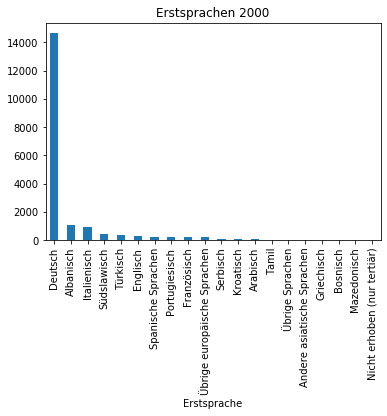

In [79]:
#in einem Balkendiagramm darstellen
df_zuerichsee2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).head(20).plot(kind='bar', 
                                                title="Erstsprachen 2000")

In [175]:
df_zuerichsee2000_new = df_zuerichsee2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False)

In [176]:
#ohne Deutsch, da es so vielsagender ist bezüglich der neuen Sprachen
df_zuerichsee2000_new.drop("Deutsch")

Erstsprache
Albanisch                         1043
Italienisch                        904
Südslawisch                        423
Türkisch                           370
Englisch                           297
Spanische Sprachen                 252
Portugiesisch                      244
Französisch                        227
Übrige europäische Sprachen        217
Serbisch                            97
Kroatisch                           89
Arabisch                            52
Tamil                               47
Übrige Sprachen                     46
Andere asiatische Sprachen          39
Griechisch                          36
Bosnisch                            26
Mazedonisch                         26
Nicht erhoben (nur tertiär)         26
Rätoromanisch                       25
Afrikanische Sprachen               23
Übrige ostasiatische Sprachen       18
Iranische Sprachen                  15
Übrige slawische Sprachen           14
Niederländisch                      14
Thai         

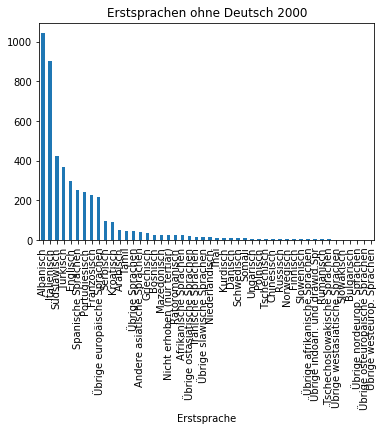

In [177]:
#plotten
df_zuerichsee2000_new.drop("Deutsch").plot(kind='bar', 
                                                title="Erstsprachen ohne Deutsch 2000")

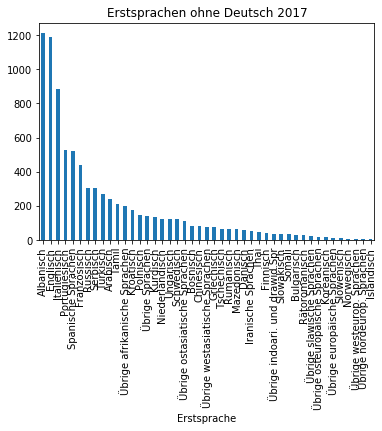

In [178]:
#und jetzt das Ganze noch für das Jahr 2017, plotten und neues Dataframe
df_zuerichsee.loc[2017]
df_zuerichsee2017 = df_zuerichsee.loc[2017]
df_zuerichsee2017.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch").plot(kind='bar', 
                                                title="Erstsprachen ohne Deutsch 2017")

In [179]:
#Weitere Dataframes für die Jahre 2005, 2010 und 2015 erstellen
df_zuerichsee.loc[2005]
df_zuerichsee.loc[2010]
df_zuerichsee.loc[2015]
df_zuerichsee2005 = df_zuerichsee.loc[2005]
df_zuerichsee2010 = df_zuerichsee.loc[2010]
df_zuerichsee2015 = df_zuerichsee.loc[2015]
df_zuerichsee2005.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_zuerichsee2010.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_zuerichsee2015.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_nogerman2000 = df_zuerichsee2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_nogerman2005 = df_zuerichsee2005.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_nogerman2010 = df_zuerichsee2010.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_nogerman2015 = df_zuerichsee2015.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_nogerman2017 = df_zuerichsee2017.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")

In [180]:
#Alle Datenreihen in einem neuen Dataframe zusammenführen
df_combined = pd.DataFrame({'2000': df_nogerman2000,
                            "2005": df_nogerman2005,
                            "2010": df_nogerman2010,
                            "2015": df_nogerman2015,
                            '2017': df_nogerman2017})

In [182]:
df_combined

,2000,2005,2010,2015,2017
Afrikanische Sprachen,23.0,18,3.0,NaN,NaN
Albanisch,1043.0,1196,1181.0,1223.0,1213.0
Andere asiatische Sprachen,39.0,80,22.0,1.0,NaN
Arabisch,52.0,75,71.0,144.0,239.0
Bosnisch,26.0,58,66.0,83.0,82.0
Bulgarisch,1.0,2,9.0,26.0,30.0
Chinesisch,5.0,27,44.0,68.0,81.0
Dänisch,8.0,24,46.0,63.0,57.0
Englisch,297.0,521,782.0,1065.0,1187.0
Finnisch,4.0,16,28.0,35.0,43.0


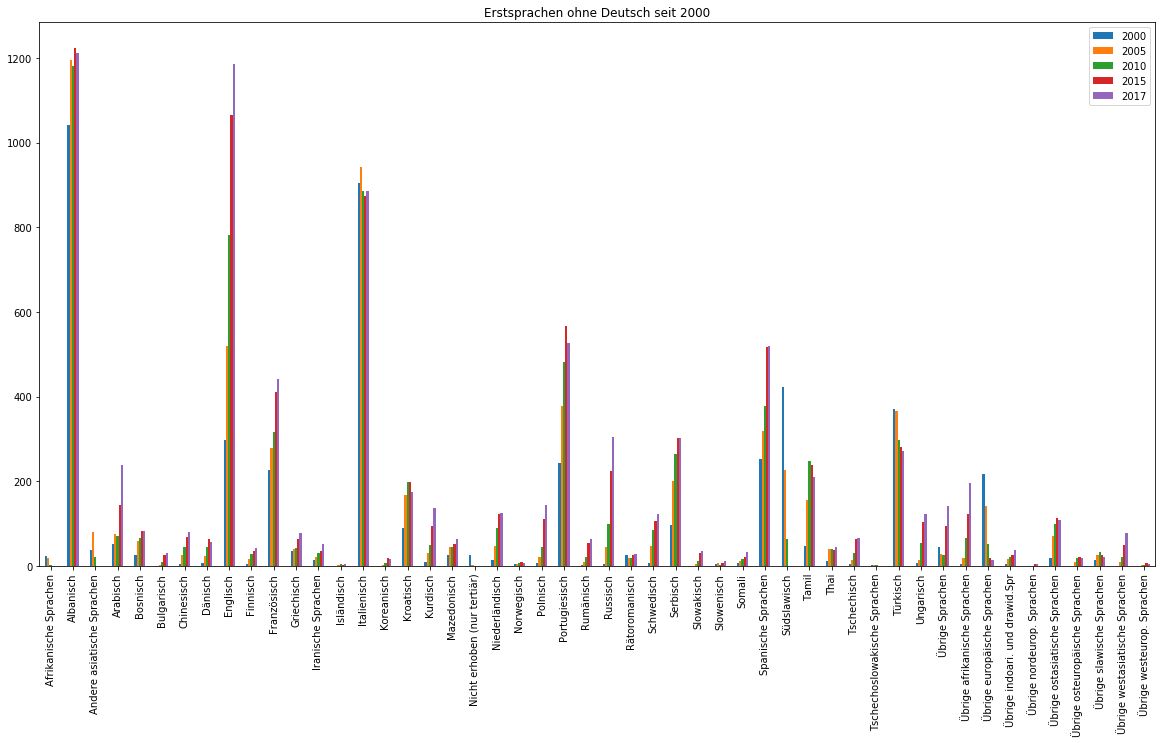

In [184]:
#Und plotten
df_combined.plot(kind='bar', figsize=(20,10), title="Erstsprachen ohne Deutsch seit 2000")

In [185]:
df_combined.drop("Nicht erhoben (nur tertiär)")
df_list_sprachen = df_combined.drop("Nicht erhoben (nur tertiär)")

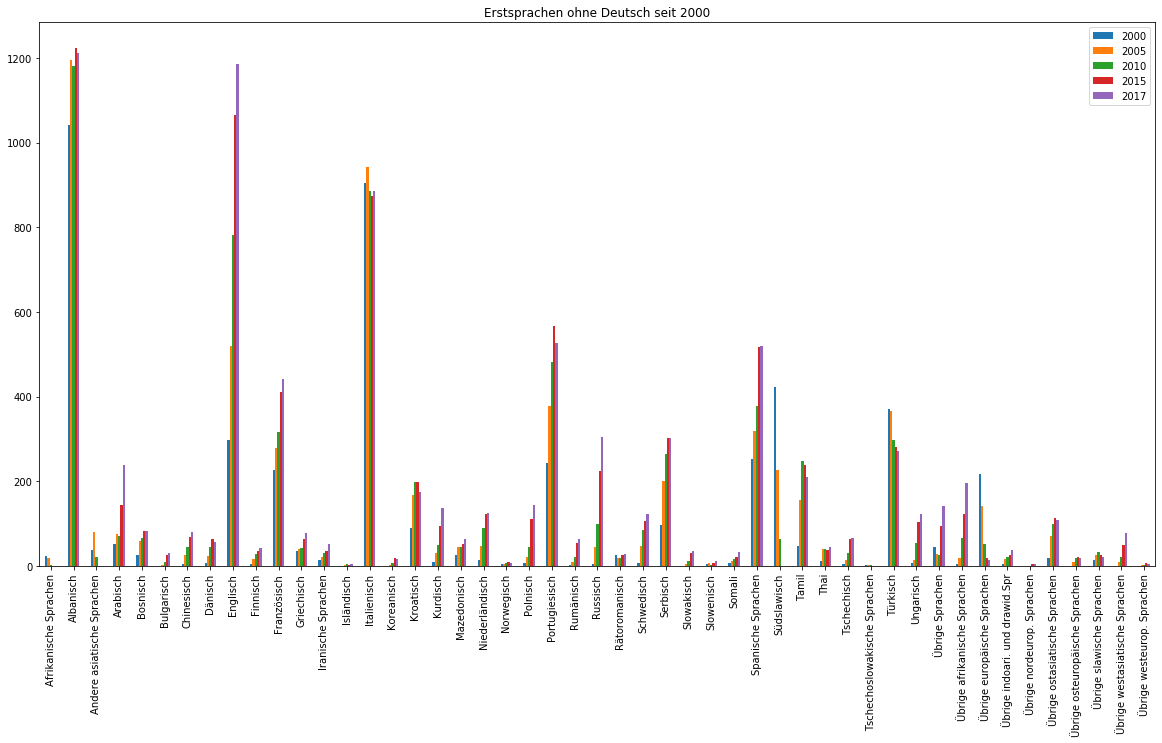

In [186]:
df_list_sprachen.plot(kind='bar', figsize=(20,10), title="Erstsprachen ohne Deutsch seit 2000")

In [211]:
#Liste etwas abspecken und die "traditionellen" und "PFZ"-Sprachen ziehen
df_list_sprachen.loc[{"Albanisch","Bosnisch","Englisch","Französisch",
                      "Italienisch","Kroatisch","Mazedonisch","Portugiesisch",
                      "Serbisch","Türkisch","Arabisch","Niederländisch","Schwedisch",
                      "Spanische Sprachen","Tamil"}]
df_condensed = df_list_sprachen.loc[{"Albanisch","Bosnisch","Englisch","Französisch",
                      "Italienisch","Kroatisch","Mazedonisch","Portugiesisch",
                      "Serbisch","Türkisch","Arabisch","Niederländisch","Schwedisch",
                      "Spanische Sprachen","Tamil"}]

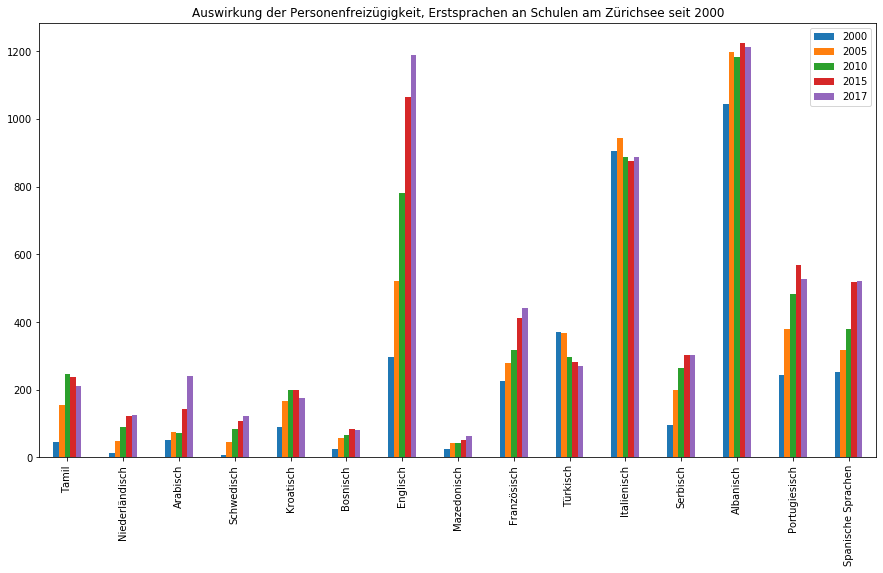

In [214]:
df_condensed.plot(kind='bar', figsize=(15,8), title="Auswirkung der Personenfreizügigkeit, Erstsprachen an Schulen am Zürichsee seit 2000")

Fazit: Die Datenanalyse stützt die These. Die Zahl der Kinder an den Schulen am Zürichsee, die die "neuen" PFZ-Zuwanderungssprachen wie Englisch, Französisch, Niederländisch, Schwedisch oder Portugiesisch als Erstsprache sprechen, hat stark zugenommen und nimmt weiter zu.

Die traditionellen Zuwanderungssprachen (Italienisch, Bosnisch, Südslawisch, Türkisch, Tamil) nehmen ab oder stagnieren. Die Zahl der Kinder, die Albanisch und Serbisch sprechen, nahm bis vor einigen Jahren noch zu, stagniert nun aber oder ist ebenfalls rückläufig.